Import libraries 

In [107]:
# Add environment Packages paths to conda
import warnings
import pandas as pd
import numpy as np
warnings.simplefilter("ignore")

# Text preprocessing packages
import re # Regex Package
import regex
import emoji
# Corpora is a group presenting multiple collections of text documents. A single collection is called corpus.
import arabicstopwords.arabicstopwords as stp #more range of arabic stop words
from nltk.stem.isri import ISRIStemmer
import pyarabic.araby as araby

# Text Embedding
from sklearn.feature_extraction.text import TfidfVectorizer

# Visualization Packages
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1.3)
%matplotlib inline

# Evaluation Packages
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

# ML Packages
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



# Save the model
import joblib

In [5]:
df = pd.read_csv('Processed_Training_set.csv')
dfTest = pd.read_csv('Filtered_Processed_Testing_set.csv')
df.head()

,words,emotion
0,#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد ...,joy
1,#مناره_الحدباء هذا العمل يدل ان لا ثورة عشائر ...,anger
2,⁦مرحبا أنتي جميله وهناك شخص يحبك كوني سعيده دا...,joy
3,#عوده_اخطر_معلمين_في_العالم\nوعليكم السلام ايو...,joy
4,#غرابييب_سود\nلم أتابعه لكن أرى الكثير ناقمين ...,anger


In [6]:
dfTest.head()

,words,emotion
0,إنها على وشك ان تصبح السابعه ونصف صباحا وأنت و...,sadness
1,كل الي اقدر اقوله. كرهتك وليتني ما عرفتك. \n#ندم,sadness
2,ادري بس بدون صراخ ازعجتني,sadness
3,محتاجة كائن يشاركني اوقاتي رسم لوحة لحظة نرفزة...,sadness
4,بجد ايه الكونسبت ال بيخليكى تقلعى الطرحه يوم خ...,anger


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16014 entries, 0 to 16013
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    16014 non-null  object
 1   emotion  16014 non-null  object
dtypes: object(2)
memory usage: 250.3+ KB


In [8]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2145 entries, 0 to 2144
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   words    2145 non-null   object
 1   emotion  2145 non-null   object
dtypes: object(2)
memory usage: 33.6+ KB


In [9]:
#print the number of null values in each column
df.isnull().sum()

words      0
emotion    0
dtype: int64

In [10]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [164]:
#to get the index of the null value
df[df['words'].isnull() == True]

,words,joy,sadness,anger,fear,disgust,surprise


In [11]:
#print the number of duplicated values 
df.duplicated().sum()

13

In [12]:
#print the rows which are duplicated
df[df['words'].duplicated() == True]

,words,emotion
11310,رعب,sadness
11322,سخط,anger
11431,متحمس,joy
11465,مرعب,sadness
11470,مستاء,sadness
11508,وجع,sadness
11800,جميل,joy
11917,سعيد,joy
11922,سلام,joy
12034,غريب,surprise


In [13]:
dfTest[dfTest['words'].duplicated() == True]

,words,emotion
1416,بتبصوا ليهه بشفقة ومالكوا متعاطفين أنا مش حزين...,sadness
1417,أبي قد تركتني وحيد في الدنيا قد تركتني أحتاج ل...,sadness
1422,#عتاب #غياب #فراق #عشق #قصايد #حب - رآحو وانا ...,sadness
1423,قاعده اعيش جو غريب حاليا قرف مع اشمئزاز مع غضب...,sadness
1424,في قانُون غيرتي:\nالذبح وقت الغيِرة حلال!! ??,anger
...,...,...
2020,أما اليوم فقد وصل العالم لدرجة مخيفة في الاستخ...,anger
2021,@aliimortada هاي مش لم_نكن_على_علم هاي بلاوي ن...,anger
2022,#حفله_ماجنه_بجامعة_نوره إذا ضعف الإيمان بالله ...,joy
2023,ي رب إجعل نهاية هالهم فرح ?? ??,joy


In [14]:
#removing duplicated values
index = df[df['words'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [15]:
df[df['words'].duplicated() == True]

,words,emotion


In [16]:
index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

In [17]:
dfTest[dfTest['words'].duplicated() == True]

,words,emotion


In [49]:
#are there any stop words in the data?
arabic_stopwords = stp.stopwords_list()
len(stp.stopwords_list())

13465

In [18]:
df['stop_words'] = df['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
df.stop_words.value_counts()

stop_words
0     6453
1     2685
2     2272
3     1772
4     1171
5      751
6      428
7      212
8      126
9       55
10      39
11      12
12      10
14       4
13       2
27       1
15       1
Name: count, dtype: int64

In [174]:
dfTest['stop_words'] = dfTest['words'].apply(lambda x: len(set(x.split()) & set(arabic_stopwords)))
dfTest.stop_words.value_counts()

stop_words
1     466
2     442
3     345
0     285
4     274
5     192
6     139
7      62
8      44
9      29
10     14
11      4
12      3
13      1
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

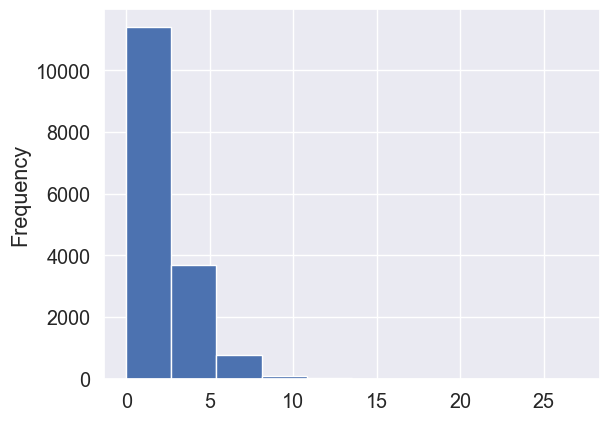

In [175]:
df['stop_words'].plot(kind= 'hist')

In [19]:
#to count the number of emojis in the dataset
def emoji_counter(sentence):
    return emoji.emoji_count(sentence)

df['emoji_count'] = df['words'].apply(lambda x: emoji_counter(x))
df.emoji_count.value_counts()[:10]

emoji_count
0    13267
1     1301
2      792
3      302
4      144
5       69
6       48
7       18
8       15
9       10
Name: count, dtype: int64

extract the emojis from every text


In [20]:
emojis_data = df[df['emoji_count'] > 0]

In [21]:
def extract_emoji(text):
    import emoji
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(emoji.distinct_emoji_list(char) for char in word):
            emoji_list.append(word)
    
    return emoji_list

In [22]:
emojis_data['emoji'] = emojis_data['words'].apply(lambda x: extract_emoji(x))
emojis_data['emoji'] = emojis_data['emoji'].apply(lambda x: ' '.join([word for word in x ]))

In [23]:
emojis_data

,words,emotion,emoji_count,emoji
0,#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد ...,joy,4,😎 😂 🌚 💔
2,⁦مرحبا أنتي جميله وهناك شخص يحبك كوني سعيده دا...,joy,1,💘
7,#فرحه_قلبك_تتمثل_في رضا ربنا و حب الناس اللي ح...,joy,1,🙏
10,#فرحتي_نجاحي في مجتمعنا يرون أن إنجاب الذكر أم...,anger,1,✋
11,<&lt; و فجاه !! كرهت شخصا لم اتوقع ان اكرهه ي...,surprise,2,😯 💔
...,...,...,...,...
11155,أينعم مكانش حد فينا طايق حد اليوم ده وبيشتموا ...,joy,1,❤
11158,علي قدر الواحد يكون مبسوط و متفائل\nعلي قدر ما...,sadness,2,😢 💔
11159,??🌸 السعاده ليست حلم و لا وھم ولا بأمر محال بل...,joy,2,🌸 🌺
11160,#ريح_المدام\nالكبوت \n#بهجت : كبوت ايه ...تابو...,joy,3,😂 👌 💪


In [181]:
#find most repeated emojis
pd.Series(' '.join(emojis_data['emoji']).split()).value_counts()[:10]

😂     822
💔     502
😭     327
😍     235
❤     219
❤️    170
😠     148
😢     143
😡     128
😔      96
Name: count, dtype: int64

Cleaning

In [25]:
emojis = {
    "🙂":"ضحك",
    "🤣":"ضحك",
    "😂":"ضحك",
    "💔":"حزن",
    "🙂":"ضحك",
    "❤️":"حب",
    "❤":"حب",
    "😍":"حب",
    "😭":"حزن",
    "😢":"حزن",
    "😔":"حزن",
    "♥":"حب",
    "💜":"حب",
    "😅":"ضحك",
    "🙁":"حزن",
    "💕":"حب",
    "💙":"حب",
    "😞":"حزن",
    "😊":"فرح",
    "👏":"يصفق",
    "👌":"احسنت",
    "😴":"نوم",
    "😀":"ضحك",
    "😌":"حزن",
    "🌹":"وردة",
    "🙈":"حب",
    "😄":"ضحك",
    "😐":"محايد",
    "✌":"منتصر",
    "✨":"نجمه",
    "🤔":"تفكير",
    "😏":"يستهزء",
    "😒":"يستهزء",
    "🙄":"ملل",
    "😕":"عصبية",
    "😃":"ضحك",
    "🌸":"وردة",
    "😓":"حزن",
    "💞":"حب",
    "💗":"حب",
    "😑":"منزعج",
    "💭":"تفكير",
    "😎":"ثقة",
    "💛":"حب",
    "😩":"حزن",
    "💪":"عضلات",
    "👍":"موافق",
    "🙏🏻":"شكر",
    "😳":"مصدوم",
    "👏🏼":"تصفيق",
    "🎶":"موسيقي",
    "🌚":"صمت",
    "💚":"حب",
    "🙏":"شكر",
    "💘":"حب",
    "🍃":"سلام",
    "☺":"ضحك",
    "🐸":"ضفدع",
    "😶":"مصدوم",
    "✋🏻":"توقف",
    "😉":"غمزة",
    "🌷":"حب",
    "🙃":"مبتسم",
    "😫":"حزين",
    "😨":"مصدوم",
    "🎼 ":"موسيقي",
    "🍁":"مرح",
    "🍂":"مرح",
    "💟":"حب",
    "😪":"حزن",
    "😆":"ضحك",
    "😣":"استياء",
    "☺️":"حب",
    "😱":"مصدوم",
    "😁":"ضحك",
    "😖":"استياء",
    "🏃🏼":"يجري",
    "😡":"غضب",
    "🚶":"يسير",
    "🤕":"مرض",
    "‼️":"تعجب",
    "🕊":"طائر",
    "👌🏻":"احسنت",
    "❣":"حب",
    "🙊":"مصدوم",
    "💃":"مرح",
    "💃🏼":"مرح",
    "😜":"مرح",
    "👊":"ضربة",
    "😟":"استياء",
    "💖":"حب",
    "😥":"حزن",
    "🎻":"موسيقي",
    "✒":"يكتب",
    "🚶🏻":"يسير",
    "💎":"الماس",
    "😷":"مرض",
    "☝":"واحد",
    "🚬":"تدخين",
    "💐" : "ورد",
    "🌞" : "شمس",
    "👆" : "الاول",
    "⚠️" :"تحذير",
    "🤗" : "احتواء",
    "✖️": "غلط",
    "📍"  : "مكان",
    "👸" : "ملكه",
    "👑" : "تاج",
    "✔️" : "صح",
    "💌": "قلب",
    "😲" : "مندهش",
    "💦": "ماء",
    "🚫" : "خطا",
    "👏🏻" : "ممتاز",
    "🏊" :"يسبح",
    "👍🏻": "تمام",
    "⭕️" :"دائره",
    "🎷" : "موسيقي",
    "👋": "تلويح باليد",
    "✌🏼": "علامه النصر",
    "🌝":"ضحك",
    "➿"  : "عقده مزدوجه",
    "💪🏼" : "قوي",
    "📩":  "تواصل معي",
    "☕️": "قهوه",
    "😧" : "قلق و صدمة",
    "🗨": "رسالة",   
    "❗️" :"تعجب",
    "🙆🏻": "اشاره موافقه",
    "👯" :"اخوات",
    "©" :  "رمز",
    "👵🏽" :"سيده عجوزه",
    "🐣": "كتكوت",  
    "🙌": "تشجيع",
    "🙇": "شخص ينحني",
    "👐🏽":"ايدي مفتوحه",    
    "👌🏽": "بالظبط",
    "⁉️" : "استنكار",
    "⚽️": "كوره",
    "🕶" :"حب",
    "🎈" :"بالون",    
    "🎀":    "ورده",
    "💵":  "فلوس",   
    "😋":  "جائع",
    "😛":  "يغيظ",
    "😠":  "غضب",
    "✍🏻":  "يكتب",
    "🌾":  "ارز",
    "👣":  "اثر قدمين",
    "❌":"رفض",
    "🍟":"طعام",
    "👬":"صداقة",
    "🐰":"ارنب",
    "☂":"مطر",
    "⚜":"مملكة فرنسا",
    "🐑":"خروف",
    "🗣":"صوت مرتفع",
    "👌🏼":"احسنت",
    "☘":"مرح",
    "😮":"صدمة",
    "😦":"قلق",
    "⭕":"الحق",
    "✏️":"قلم",
    "ℹ":"معلومات",
    "🙍🏻":"رفض",
    "⚪️":"نضارة نقاء",
    "🐤":"حزن",
    "💫":"مرح",
    "💝":"حب",
    "🍔":"طعام",
    "❤︎":"حب",
    "✈️":"سفر",
    "🏃🏻‍♀️":"يسير",
    "🍳":"ذكر",
    "🎤":"مايك غناء",
    "🎾":"كره",
    "🐔":"دجاجة",
    "🙋":"سؤال",
    "📮":"بحر",
    "💉":"دواء",
    "🙏🏼":"شكر",
    "💂🏿 ":"حارس",
    "🎬":"سينما",
    "♦️":"مرح",
    "💡":"قكرة",
    "‼":"تعجب",
    "👼":"طفل",
    "🔑":"مفتاح",
    "♥️":"حب",
    "🕋":"كعبة",
    "🐓":"دجاجة",
    "💩":"معترض",
    "👽":"فضائي",
    "☔️":"مطر",
    "🍷":"عصير",
    "🌟":"نجمة",
    "☁️":"سحب",
    "👃":"معترض",
    "🌺":"مرح",
    "🔪":"سكينة",
    "♨":"سخونية",
    "👊🏼":"ضرب",
    "✏":"قلم",
    "🚶🏾‍♀️":"يسير",
    "👊":"ضرب",
    "◾️":"وقف",
    "😚":"حب",
    "🔸":"مرح",
    "👎🏻":"لا يعجبني",
    "👊🏽":"ضربة",
    "😙":"حب",
    "🎥":"تصوير",
    "👉":"جذب انتباه",
    "👏🏽":"يصفق",
    "💪🏻":"عضلات",
    "🏴":"اسود",
    "🔥":"حريق",  
    "😬":"قلق",   
    "👊🏿":"يضرب",    
    "🌿":"ورقه شجره",     
    "✋🏼":"كف ايد",    
    "👐":"ايدي مفتوحه",      
    "☠️":"رعب",     
    "🎉":"يهنئ",      
    "🔕" :"صامت",
    "😿":"حزن",      
    "☹️":"حزن",     
    "😘" :"حب",     
    "😰" :"خوف و حزن",
    "🌼":"ورده",      
    "💋":"بوسه",
    "👇":"لاسفل",     
    "❣️":"حب",     
    "🎧":"سماعات",
    "📝":"يكتب",      
    "😇":"سعيد",      
    "😈":"رعب",      
    "🏃":"يجري",      
    "✌🏻":"علامه النصر",    
    "🔫":"يضرب",      
    "❗️":"تعجب",
    "👎":"غير موافق",      
    "🔐":"قفل",      
    "👈":"لليمين",
    "™":"رمز",    
    "🚶🏽":"يتمشي",    
    "😯":"متفاجأ",  
    "✊":"يد مغلقه",    
    "😻":"اعجاب",    
    "🙉" :"قرد",    
    "👧":"طفله",     
    "🔴":"دائره حمراء",      
    "💪🏽":"قوه",     
    "💤":"نوم",     
    "👀":"حيره",     
    "✍🏻":"يكتب",  
    "❄️":"تلج",
    "💀":"رعب",   
    "😤":"غضب",      
    "🖋":"قلم",      
    "🎩":"كاب",      
    "☕️":"قهوه",     
    "😹":"ضحك",     
    "💓":"حب",      
    "☄️ ":"نار",     
    "👻":"رعب",
    "🤮":"مقرف",
    "🤢":"مقرف",
    "🤪":"مرح",
    "🥴":"تعب",
    "🤧":"مرض",
    "🤒":"مرض",
    "🤕":"مرض",
    "🤑":"مرح",
    "🤐":"صمت",
    "🤫":"صمت",
    "🤭":"ضحك",
    "🧐":"تفكير",
    "🤓":"ذكاء",
    "🤩":"مرح",
    "🥳":"مرح",
    "🥺":"حزن",
    "🤥":"كذب",
    "🤔":"تفكير",
    "🤗":"مرح",
    "🥰":"مرح",
    "🤍":"حب",
    "🤲":"دعاء",
    "󾌴":"",
    "🤦":"الم",
    "🤷‍":"قلق",
    "🤚":"يد",
    "🦋":"مرح",
    "🥇":"فوز",
    }

emoticons_to_words = {
    ":))" : "ضحك",
    "((:" : "ضحك",
    ":)" : "ضحك",
    "(:" : "ضحك",
    ":(" : "حزن",
    "):" : "حزن",
    "xD" : "ضحك",
    ":=(": "يبكي",
    ":'(": "حزن",
    ":'‑(": "حزن",
    "XD" : "ضحك",
    ":D" : "ضحك",
    "♬" : "موسيقي",
    "♡" : "حب",
    "☻"  : "ضحك",
    }

Functions

In [50]:
def remove_stop_words(text):
    Text=[i for i in str(text).split() if i not in arabic_stopwords]
    return " ".join(Text)

def ISRI_Stemmer(text):
    #making an object
    stemmer = ISRIStemmer()
    
    #stemming each word
    text = stemmer.stem(text)
    text = stemmer.pre32(text)
    text = stemmer.suf32(text)
    
    return text

def Snowball_stemmer(text):
    text = text.split()
    #making an object
    stemmer = SnowballStemmer("arabic")
    
    #stemming each word
    text=[stemmer.stem(y) for y in text]
    
    return " " .join(text)

def Arabic_Light_Stemmer(text):
    #making an object
    Arabic_Stemmer = ArabicLightStemmer()
    
    #stemming each word
    text=[Arabic_Stemmer.light_stem(y) for y in text.split()]
    
    return " " .join(text)

import nltk
from nltk.stem.isri import ISRIStemmer

def lemmatize_arabic_Iris(text):
    stemmer = ISRIStemmer()
    text=[stemmer.stem(y) for y in text.split()]
    return " " .join(text)

def normalizeArabic(text):
    text = text.strip()
    text = re.sub("ى", "ي", text)
    text = re.sub("ؤ", "ء", text)
    text = re.sub("ئ", "ء", text)
    text = re.sub("ة", "ه", text)
    
    #remove repetetions
    text = re.sub("[إأٱآا]", "ا", text)
    text = text.replace('وو', 'و')
    text = text.replace('يي', 'ي')
    text = text.replace('ييي', 'ي')
    text = text.replace('اا', 'ا')

    #Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    
    #Remove longation
    text = re.sub(r'(.)\1+', r"\1\1", text) 
    
    #Strip vowels from a text, include Shadda.
    text = araby.strip_tashkeel(text)
    
    #Strip diacritics from a text, include harakats and small lettres The striped marks are
    text = araby.strip_diacritics(text)
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_non_arabic(text):
    text = re.sub('[A-Za-z]+',' ',text)
    return text

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def Removing_punctuations(text):
    # Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"0123456789\\A-Za-z"""), ' ', text)
    text = text.replace('؛',"", )
    
    # Remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\U0001F700-\U0001F77F"  # alchemical symbols
                           u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                           u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                           u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                           u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                           u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                           u"\u200d"                 # zero-width joiner
                           u"\uFE0F"                 # variation selector-16
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string).strip()

def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text).strip()


def remove_extra_Space(text):
    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    return  " ".join(text.split())

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.words.iloc[i].split()) < 3:
            df.words.iloc[i] = np.nan
            
            
def replace_emoticon_with_text(text):
    for i in range (len(text)):
        message = text.iloc[i]
        seperarate_word = message.split(' ')
        text.iloc[i] = ""

        for word in seperarate_word:
            text.iloc[i] += emoticons_to_words.get(word, word) + " "

def replace_emojis_with_text(text):
    for i in range (len(text)):
            message = text.iloc[i]
            seperarate_word = regex.findall(r'\X', message)
            text.iloc[i] = ""

            for word in seperarate_word:
                if any(emoji.distinct_emoji_list(char)  for char in word):
                        text.iloc[i] += " " + emojis.get(word, word) + " "
                else:
                        text.iloc[i] +=  emojis.get(word, word) + ""
                        
def space_between_emojis(s): 
    return ''.join((' '+c+' ') if c in emoji.UNICODE_EMOJI['en'] else c for c in s)

def remove_hashtages_and_mentions(text):
    text = re.sub("@[A-Za-z0-9_]+","", text)
    text = re.sub("#[A-Za-z0-9_]+","", text)
    return text

def remove_unicode_escape(text):
    # Define the regex pattern for Unicode escape sequences
    unicode_pattern = r'\\u[0-9*a-z*A-Z*]{4}'

    # Use re.sub() to remove Unicode escape sequences
    return re.sub(unicode_pattern, '', text)

In [27]:
cleaned_data = pd.read_csv('Processed_Training_set.csv')

In [28]:
cleaned_data.head()

,words,emotion
0,#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد ...,joy
1,#مناره_الحدباء هذا العمل يدل ان لا ثورة عشائر ...,anger
2,⁦مرحبا أنتي جميله وهناك شخص يحبك كوني سعيده دا...,joy
3,#عوده_اخطر_معلمين_في_العالم\nوعليكم السلام ايو...,joy
4,#غرابييب_سود\nلم أتابعه لكن أرى الكثير ناقمين ...,anger


Removing duplicated values


In [29]:
num_of_duplications = cleaned_data.duplicated().sum()
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

In [30]:
#Before
num_of_duplications

13

In [31]:
#Ater
cleaned_data.duplicated().sum()

0

In [32]:
dfTest.duplicated().sum()

0

In [33]:
cleaned_data

,words,emotion
0,#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد ...,joy
1,#مناره_الحدباء هذا العمل يدل ان لا ثورة عشائر ...,anger
2,⁦مرحبا أنتي جميله وهناك شخص يحبك كوني سعيده دا...,joy
3,#عوده_اخطر_معلمين_في_العالم\nوعليكم السلام ايو...,joy
4,#غرابييب_سود\nلم أتابعه لكن أرى الكثير ناقمين ...,anger
...,...,...
15989,يوم الاجازة,joy
15990,يوم القيامة,sadness
15991,يؤثر,joy
15992,يؤجر,joy


#### Replace emoticons with Text


In [34]:
replace_emoticon_with_text(cleaned_data.words)

In [36]:
replace_emoticon_with_text(dfTest.words)

Replace each emoji with a text

In [37]:
replace_emojis_with_text(cleaned_data.words)

In [38]:
replace_emojis_with_text(dfTest.words)

In [39]:
#Remove any other emoji
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_emoji(text))
dfTest.words=dfTest.words.apply(lambda text : remove_emoji(text))

In [40]:
#Before
df.iloc[0].words

'#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد باللي ابيه وم في احد يعرفني ولله الحمد مرتاحه 😎 😂 🌚 💔'

In [41]:
#After
cleaned_data.iloc[0].words

'#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد باللي ابيه وم في احد يعرفني ولله الحمد مرتاحه  ثقة   ضحك   صمت   حزن'

In [42]:
#After
print(df.iloc[8287].words)
print(cleaned_data.iloc[8287].words)
print(df.iloc[993].words)
print(cleaned_data.iloc[993].words)
print(df.iloc[1178].words)
print(cleaned_data.iloc[1178].words)
print(df.iloc[1512].words)
print(cleaned_data.iloc[1512].words)
print(dfTest.iloc[256].words)
print(df.iloc[1685].words)
print(cleaned_data.iloc[1685].words)
print(df.iloc[1816].words)
print(cleaned_data.iloc[1816].words)

#بهجة_أمل ٧٤ الحمدلله على شعور السكينة و السلام اللي بحس فيهم *فيس مغمض عيونه في حالة استرخاء و هدوء نفسي* :) 🌼 💛 🌼 💛 🌼 💛
#بهجة_أمل ٧٤ الحمدلله على شعور السكينة و السلام اللي بحس فيهم *فيس مغمض عيونه في حالة استرخاء و هدوء نفسي* ضحك  ورده   حب   ورده   حب   ورده   حب
: خايف مع الايام تنسي اللي بينا قوام :)!
: خايف مع الايام تنسي اللي بينا قوام :)!
sh خايك معا حمد ويقولوله دودو :))
sh خايك معا حمد ويقولوله دودو ضحك
اهون عليكي تهوني عليا  يالا ف داهيه :)  كرهتك
اهون عليكي تهوني عليا  يالا ف داهيه ضحك  كرهتك
#مرحبا_بترامب_بدوله_الحزم الزيارة كلها مقابل ?? مليار مافية مشكلة فلوس وسخ دنيآ لكن تكفى طالبك جب بنتك معك والله انها ثقة الثقة شقراء?? ??
��😂😂😂😂 اني حيل خايفه الْيَوْمَ
ضحك  ضحك  ضحك  ضحك  اني حيل خايفه الْيَوْمَ
✿♩ البرد ماهو رجفه يدين وعظام البرد برد الروح لاغاب غاليك ..  ﴿ 😴💙ءء﴾  فراق  عبارات
البرد ماهو رجفه يدين وعظام البرد برد الروح لاغاب غاليك ..    نوم  حب ءء  فراق  عبارات


Removing arabic stopwords


In [51]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_stop_words(text))
dfTest.words=dfTest.words.apply(lambda text : remove_stop_words(text))

Removal of non-Arabic words

In [52]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_non_arabic(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_non_arabic(text))

In [53]:
#Before
df.words.iloc[18]

'#الهيبة #نادين_نسيب_نجيم #ملكة_الهيبة ايواااا راحت عليكي يا عليا بلش الفلم معك @nadinenjeim  اسا بدن يحطوها تحت الامر الواقع 😦'

In [54]:
#After
cleaned_data.iloc[18].words

'#الهيبة #نادين_نسيب_نجيم #ملكة_الهيبة ايواااا راحت عليكي يا عليا بلش الفلم @  اسا بدن يحطوها الامر الواقع قلق'

In [55]:
print(df.words.iloc[7000])
cleaned_data.words.iloc[7000]

الخوف واضح في كلامي وعيني اشوفه بـ عينك قبل ما اسمع حكاك نخاف بس الفرق.. بينك وبيني تخاف تذكرني وانا خايف انساك😔


'الخوف واضح كلامي اشوفه بـ اسمع حكاك نخاف الفرق.. تخاف تذكرني وانا خايف انساك حزن'

Removing Diacritics

In [56]:
cleaned_data.words=cleaned_data.words.apply(lambda text : normalizeArabic(text))
dfTest.words=dfTest.words.apply(lambda text : normalizeArabic(text))

In [57]:
#Before
df.words.iloc[4]

'#غرابييب_سود\\nلم أتابعه لكن أرى الكثير ناقمين عليه .. ودي أتابعه على شان أنقده .. عمومًا أنا لا أثق في mbc.'

In [58]:
#After
cleaned_data.iloc[4].words

'#غرابيب_سود\\ لم اتابعه اري الكثير ناقمين .. ودي اتابعه شان انقده .. عموما اثق .'

Removal of numbers

In [59]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_numbers(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_numbers(text))

In [60]:
#Before
df.words.iloc[8399]

'ممكن يعمي الحج تقسطلنا ال11سنة الي ضايليين  !؟ - يشعر بـالاستياء'

In [61]:
#After
cleaned_data.iloc[8399].words

'ممكن يعمي الحج تقسطلنا السنه الي ضايلين !؟ - يشعر بـالاستياء'

Removing Hastags

In [62]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_hashtages_and_mentions(text))
dfTest.words=dfTest.words.apply(lambda text : remove_hashtages_and_mentions(text))

In [63]:
#Before
df.words.iloc[0]

'#من_جمال_تويتر انو ادخل الوقت اللي ابيه واغرد باللي ابيه وم في احد يعرفني ولله الحمد مرتاحه 😎 😂 🌚 💔'

In [64]:
#After
cleaned_data.iloc[8595].words

'ادين الله حماس ارهابيه ارهبت الكيان الصهيوني ربع قرن يزيد تكون ارهابيه #حماس_ليست_ارهابيه'

Removal of Links

In [65]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_urls(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_urls(text))

In [66]:
#Before
df.words.iloc[807]

'??*قصة مأساوية لأسرة في جدة توفي أفرادها بالكامل بعد إصابتهم بـ “كورونا” (فيديو)🎥* https://ksa-wats.com/75390 هذه رسالة لكل مستهتر 😔'

In [67]:
#After
cleaned_data.iloc[807].words

'??*قصه ماساويه لاسره جده توفي افرادها بالكامل اصابتهم بـ “كورونا” (فيديو) تصوير * :// - . / رساله مستهتر حزن'

Removing Punctuations

In [68]:
cleaned_data.words=cleaned_data.words.apply(lambda text : Removing_punctuations(text))
dfTest.words=dfTest.words.apply(lambda text : Removing_punctuations(text))

In [69]:
#After
cleaned_data.iloc[8595].words

'ادين الله حماس ارهابيه ارهبت الكيان الصهيوني ربع قرن يزيد تكون ارهابيه حماس ليست ارهابيه'

Remove unicode escape

In [70]:
cleaned_data.words=cleaned_data.words.apply(lambda text : remove_unicode_escape(text))
dfTest.words=dfTest.words.apply(lambda text : remove_unicode_escape(text))

In [71]:
#Before
df.words.iloc[2]

'\u2066مرحبا أنتي جميله وهناك شخص يحبك كوني سعيده دائما لأن عيناك مذهله عندما تبتسمين 💘'

In [72]:
#After
cleaned_data.iloc[2].words

'\u2066مرحبا انتي جميله شخص يحبك كوني سعيده داءما عيناك مذهله تبتسمين حب'

In [76]:
dfTest

,words,emotion
0,وشك ان تصبح السابعه ونصف صباحا وحيد بءس,sadness
1,الي اقدر اقوله كرهتك وليتني عرفتك ندم,sadness
2,ادري صراخ ازعجتني,sadness
3,محتاجه كاءن يشاركني اوقاتي رسم لوحه نرفزهوقت ف...,sadness
4,بجد ايه الكونسبت ال بيخليكي تقلعي الطرحه يوم خ...,anger
...,...,...
2140,انا مصاب ادعولي,sadness
2141,مشهد مءلم جدا للحرم المكي يارب الغوث والفرج يا...,sadness
2142,ازمه كورونا علمتني اروح مواعيدي لحالي وانا شيء...,surprise
2143,اتوقع يوما تاتي كورونا لنا شي جميل,surprise


Reducing words to their roots

In [57]:
print(cleaned_data.words[0])

من جمال تويتر انو ادخل الوقت اللي ابيه واغرد باللي ابيه وم احد يعرفني ولله الحمد مرتاحه ثقه يضحك صمت قلب حزين


In [ ]:
#cleaned_data.words=cleaned_data.words.apply(lambda text : Arabic_Light_Stemmer(text))
#dfTest.words=dfTest.words.apply(lambda text : Arabic_Light_Stemmer(text))

## Steamer IRIS

In [77]:
cleaned_data.words=cleaned_data.words.apply(lambda text : lemmatize_arabic_Iris(text))
dfTest.words=dfTest.words.apply(lambda text : lemmatize_arabic_Iris(text))

In [78]:
cleaned_data

,words,emotion
0,من جمل يتر انو دخل وقت الل ابه غرد بلل ابه وم ...,joy
1,نره حدباء عمل يدل ان ثور عشءر كانت ولش هدم وصم...,anger
2,⁦مرحب انت جمل شخص يحب كون سعد داء عين ذهل بسم حب,joy
3,عود خطر علم في علم وعل سلم ايه شكح,joy
4,غرابيب سود لم تبع اري كثر نقم ودي تبع شان قده ...,anger
...,...,...
15989,يوم جزه,joy
15990,يوم قيم,sadness
15991,ءثر,joy
15992,ءجر,joy


In [180]:
print(lemmatize_arabic_Iris("اكرهك بكرهك كره اكره كريه كراهيه"))

اكر بكر كره اكر كره كره


In [104]:
test = ["اكرهك","بكرهك","كره","اكره","كريه","كراهيه"]
print(Arabic_Light_Stemmer("اكرهك بكرهك كره اكره كريه كراهيه"))

كره كره ره كر ري راه


In [79]:
cleaned_data.duplicated().sum()
#Note that: duplicated value was found when we remove diacritics and non arabic words and punctuations and this because some rows in the dataset only contains stopwords or it contains one or two words and other reasons so, we have to remove the duplicated values again

1734

In [80]:
dfTest.duplicated().sum()

3

In [81]:
index = cleaned_data[cleaned_data['words'].duplicated() == True].index
cleaned_data.drop(index, axis = 0, inplace = True)

#resetting the index of the data
cleaned_data.reset_index(drop=True, inplace = True)

index = dfTest[dfTest['words'].duplicated() == True].index
dfTest.drop(index, axis = 0, inplace = True)

dfTest.reset_index(drop=True, inplace = True)

In [82]:
cleaned_data.duplicated().sum()

0

In [83]:
dfTest.duplicated().sum()

0

In [84]:
cleaned_data

,words,emotion
0,من جمل يتر انو دخل وقت الل ابه غرد بلل ابه وم ...,joy
1,نره حدباء عمل يدل ان ثور عشءر كانت ولش هدم وصم...,anger
2,⁦مرحب انت جمل شخص يحب كون سعد داء عين ذهل بسم حب,joy
3,عود خطر علم في علم وعل سلم ايه شكح,joy
4,غرابيب سود لم تبع اري كثر نقم ودي تبع شان قده ...,anger
...,...,...
13606,يود,anger
13607,يوم جزه,joy
13608,يوم قيم,sadness
13609,ءجر,joy


In [ ]:
#this function will convert the text which contains one or two words into null value
#remove_small_sentences(cleaned_data)
#remove_small_sentences(dfTest)

In [85]:
cleaned_data.isnull().sum()

words      0
emotion    0
dtype: int64

In [86]:
dfTest.isnull().sum()

words      0
emotion    0
dtype: int64

In [87]:
# Write cleaned data to a new CSV file
cleaned_data.to_csv('TrainData.csv', index=False)

# Write dfTest to a new CSV file
dfTest.to_csv('TestData.csv', index=False)

In [222]:
cleaned_data.dropna(inplace = True)
dfTest.dropna(inplace = True)

In [125]:
cleaned_data

,words,emotion
0,من جمل يتر انو دخل وقت الل ابه غرد بلل ابه وم ...,joy
1,نره حدباء عمل يدل ان ثور عشءر كانت ولش هدم وصم...,anger
2,⁦مرحب انت جمل شخص يحب كون سعد داء عين ذهل بسم حب,joy
3,عود خطر علم في علم وعل سلم ايه شكح,joy
4,غرابيب سود لم تبع اري كثر نقم ودي تبع شان قده ...,anger
...,...,...
13607,يود,anger
13608,يوم جزه,joy
13609,يوم قيم,sadness
13610,ءجر,joy


## Splitting the dataset into the Training set and Test set

In [224]:
#Multi-label
X_train = cleaned_data.words.values
y_train = cleaned_data[["joy","sadness","anger","fear", "disgust","surprise"]]

X_test = dfTest.words.values
y_test = dfTest[["joy","sadness","anger","fear", "disgust","surprise"]]

In [88]:
#Multi-class
X_train = cleaned_data.words.values
y_train = cleaned_data[["emotion"]]

X_test = dfTest.words.values
y_test = dfTest[["emotion"]]

In [89]:
print(X_train[:5])

['من جمل يتر انو دخل وقت الل ابه غرد بلل ابه وم احد عرف ولل حمد رتح ثقه ضحك صمت حزن'
 'نره حدباء عمل يدل ان ثور عشءر كانت ولش هدم وصم عار بجب دخل دعش صفق ذكر ارخ حشر ولل جبناء'
 '\u2066مرحب انت جمل شخص يحب كون سعد داء عين ذهل بسم حب'
 'عود خطر علم في علم وعل سلم ايه شكح'
 'غرابيب سود لم تبع اري كثر نقم ودي تبع شان قده عمو اثق']


In [90]:
print(y_train[:5])

  emotion
0     joy
1   anger
2     joy
3     joy
4   anger


## Word Embedding

### BM-25

In [104]:
from sklearn.base import BaseEstimator, TransformerMixin
from rank_bm25 import BM25Okapi

class BM25Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, k1=1.5, b=0.75):
        self.k1 = k1
        self.b = b
        self.bm25 = None

    def fit(self, X, y=None):
        # Tokenize the documents
        tokenized_corpus = [doc.split(" ") for doc in X]
        # Initialize BM25 model
        self.bm25 = BM25Okapi(tokenized_corpus, k1=self.k1, b=self.b)
        return self

    def transform(self, X, y=None):
        # Tokenize the query/document
        tokenized_queries = [doc.split(" ") for doc in X]
        # Retrieve BM25 scores for each document-query pair
        bm25_scores = np.array([self.bm25.get_scores(query) for query in tokenized_queries])
        return bm25_scores

### Word2Vec

In [110]:
from sklearn.base import BaseEstimator, TransformerMixin
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, size=100, window=5, min_count=1, workers=10):
        self.size = size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.model = None

    def fit(self, X, y=None):
        # Tokenize documents
        tokenized_docs = [word_tokenize(doc.lower()) for doc in X]
        # Train Word2Vec model
        self.model = Word2Vec(tokenized_docs, vector_size=self.size, window=self.window,
                              min_count=self.min_count, workers=self.workers)
        return self

    def transform(self, X, y=None):
        # Transform documents to document vectors
        return np.array([
            np.mean([self.model.wv[word] for word in words if word in self.model.wv]
                    or [np.zeros(self.size)], axis=0)
            for words in [word_tokenize(doc.lower()) for doc in X]
        ])

def train_model_word2vec(model, data, targets):
    text_clf = Pipeline([
        ('vect', Word2VecVectorizer()),  
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

### GloVe

In [93]:
from gensim.downloader import load

class GloVeVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, model_name="glove-wiki-gigaword-100"):
        self.model_name = model_name
        self.model = None

    def fit(self, X, y=None):
        # Load pre-trained GloVe model
        self.model = load(self.model_name)
        return self

    def transform(self, X, y=None):
        # Transform documents to document vectors
        return np.array([
            np.mean([self.model[word] for word in word_tokenize(doc.lower()) if word in self.model]
                    or [np.zeros(self.model.vector_size)], axis=0)
            for doc in X
        ])

In [113]:
#Creating a pipline using tf-idf for words embedding and different models.
def train_model_IDF(model, data, targets):
    text_clf = Pipeline([
        ('vect',TfidfVectorizer(encoding='utf-8')),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

def train_model_BM_25(model, data, targets):
    text_clf = Pipeline([
        ('vect', BM25Vectorizer()),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

def train_model_GloVe(model, data, targets):
    text_clf = Pipeline([
        ('vect', GloVeVectorizer()),
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

### AraBertWordEmbedding

In [172]:
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.base import TransformerMixin, BaseEstimator

In [174]:
# Define a custom vectorizer using AraBERT
class AraBERTVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("aubmindlab/bert-base-arabertv2")
        self.model = AutoModel.from_pretrained("aubmindlab/bert-base-arabertv2")

    def transform(self, X):
        with torch.no_grad():
            embeddings = []
            for text in X:
                inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
                outputs = self.model(**inputs)
                embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
            return embeddings

    def fit(self, X, y=None):
        return self

# Redefine the training function to handle multi-label classification
def train_model_AraBert(model, data, targets):
    text_clf = Pipeline([
        ('vect', AraBERTVectorizer()),  # AraBERT-based vectorizer
        ('clf', model) 
    ])
    text_clf.fit(data, targets)
    return text_clf

### MaraBert

In [182]:
# Define a custom vectorizer using AraBERT
class MARBERTv2Vectorizer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.tokenizer = AutoTokenizer.from_pretrained("UBC-NLP/MARBERTv2")
        self.model = AutoModel.from_pretrained("UBC-NLP/MARBERTv2")

    def transform(self, X):
        with torch.no_grad():
            embeddings = []
            for text in X:
                inputs = self.tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
                outputs = self.model(**inputs)
                embeddings.append(outputs.last_hidden_state.mean(dim=1).squeeze().numpy())
            return embeddings

    def fit(self, X, y=None):
        return self

# Redefine the training function to handle multi-label classification
def train_model_Marabert(model, data, targets):
    text_clf = Pipeline([
        ('vect', MARBERTv2Vectorizer()),  # MARBERTv2-based vectorizer
        ('clf', model) 
    ])
    text_clf.fit(data, targets)
    return text_clf

In [123]:
labels = ['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise']

## Models

### Random Forest

#### TF-IDF

In [149]:
RF = train_model_IDF((RandomForestClassifier()), X_train, y_train)

In [150]:
y_pred_RF=RF.predict(X_test)

TF-IDF - Random Forest
Accuracy:  0.8747422680412371 

RF
              precision    recall  f1-score   support

       anger       0.88      0.83      0.85       458
     disgust       0.62      0.40      0.49        25
        fear       0.82      0.77      0.79       172
         joy       0.90      0.91      0.91       532
     sadness       0.90      0.92      0.91       747
    surprise       0.15      0.67      0.24         6

    accuracy                           0.87      1940
   macro avg       0.71      0.75      0.70      1940
weighted avg       0.88      0.87      0.88      1940



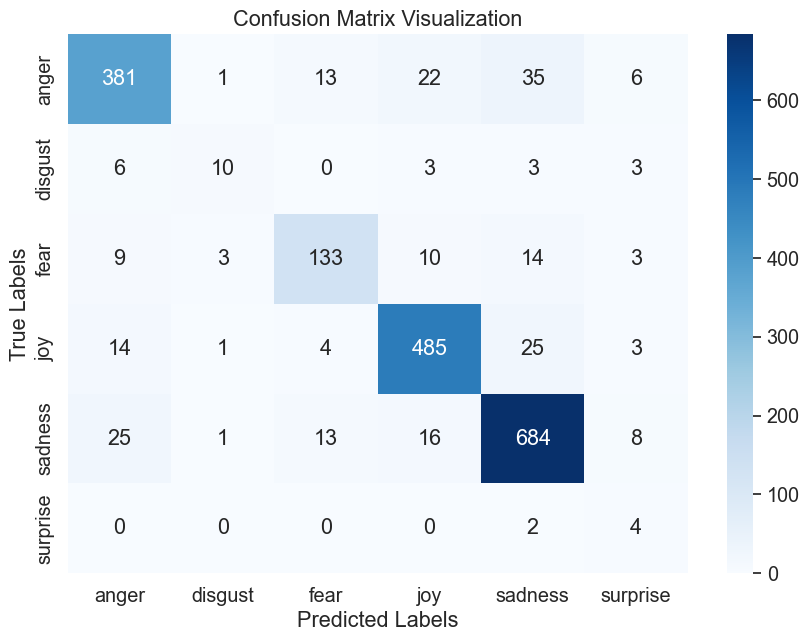

In [151]:
print("TF-IDF - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### BM-25

In [106]:
RF = train_model_BM_25((RandomForestClassifier()), X_train, y_train)

In [108]:
y_pred_RF=RF.predict(X_test)

In [109]:
print("BM25 - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

BM25 - Random Forest
Accuracy:  0.8154639175257732 

RF
              precision    recall  f1-score   support

       anger       0.75      0.83      0.79       458
     disgust       0.57      0.32      0.41        25
        fear       0.82      0.70      0.75       172
         joy       0.89      0.81      0.85       532
     sadness       0.84      0.86      0.85       747
    surprise       0.12      0.50      0.19         6

    accuracy                           0.82      1940
   macro avg       0.66      0.67      0.64      1940
weighted avg       0.82      0.82      0.82      1940

[[380   1   5  15  52   5]
 [ 12   8   0   1   2   2]
 [ 16   4 120  10  20   2]
 [ 36   1   7 430  51   7]
 [ 60   0  14  25 641   7]
 [  2   0   0   0   1   3]]


### Word2Vec

In [152]:
RF = train_model_word2vec((RandomForestClassifier()), X_train, y_train)

In [153]:
y_pred_RF=RF.predict(X_test)

Word2Vec - Random Forest
Accuracy:  0.7731958762886598 

RF
              precision    recall  f1-score   support

       anger       0.71      0.81      0.76       458
     disgust       1.00      0.28      0.44        25
        fear       0.67      0.62      0.64       172
         joy       0.88      0.79      0.84       532
     sadness       0.80      0.79      0.80       747
    surprise       0.07      0.50      0.13         6

    accuracy                           0.77      1940
   macro avg       0.69      0.63      0.60      1940
weighted avg       0.79      0.77      0.78      1940



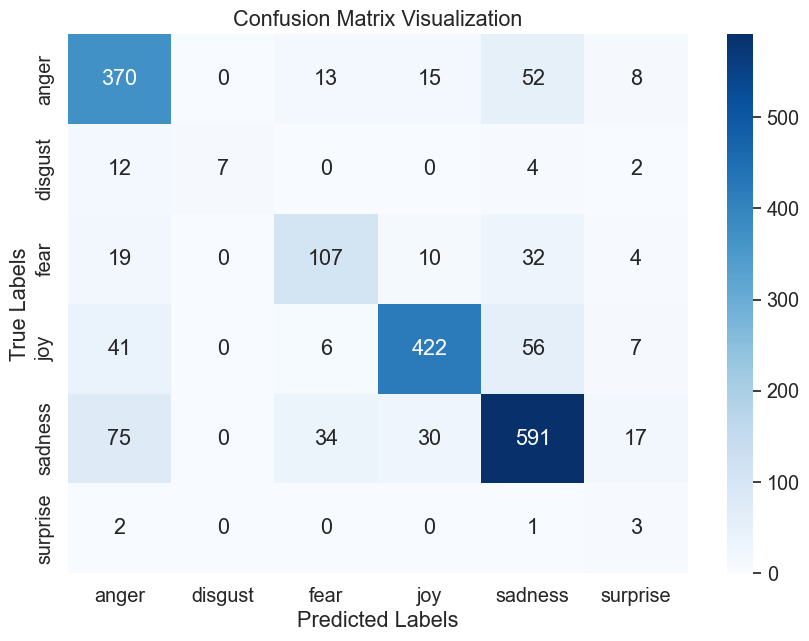

In [154]:
print("Word2Vec - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### Golve

In [155]:
RF = train_model_GloVe((RandomForestClassifier()), X_train, y_train)

In [156]:
y_pred_RF=RF.predict(X_test) 

Glove - Random Forest
Accuracy:  0.38556701030927837 

RF
              precision    recall  f1-score   support

       anger       0.17      0.01      0.02       458
     disgust       0.00      0.00      0.00        25
        fear       1.00      0.01      0.01       172
         joy       0.38      0.03      0.05       532
     sadness       0.39      0.97      0.56       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.39      1940
   macro avg       0.32      0.17      0.11      1940
weighted avg       0.38      0.39      0.23      1940



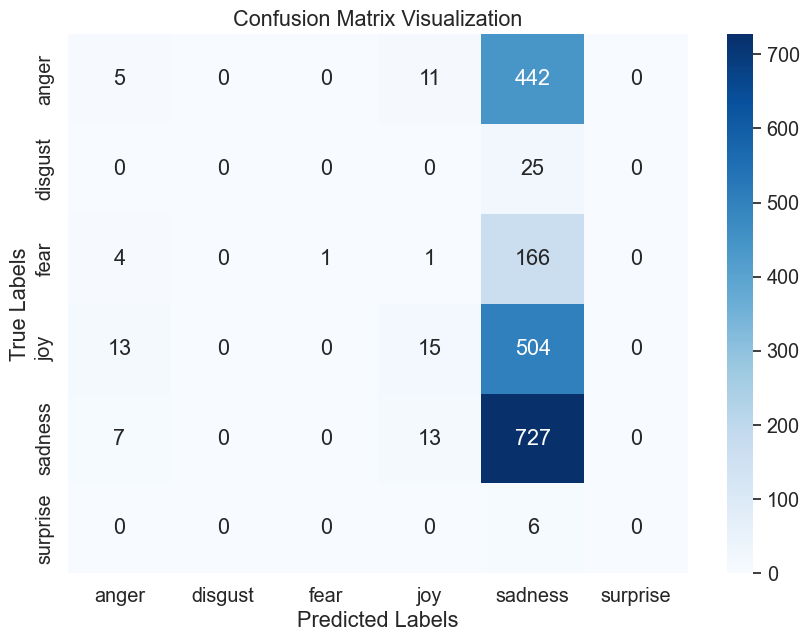

In [157]:
print("Glove - Random Forest")
RF_accuracy = accuracy_score(y_test, y_pred_RF)
print('Accuracy: ', RF_accuracy,'\n')

print('RF')
print(classification_report(y_test, y_pred_RF))

cm = confusion_matrix(y_test, y_pred_RF)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### SVM model

#### TF-IDF

In [129]:
svm = train_model_IDF((SVC(kernel="poly")), X_train, y_train)

In [130]:
y_pred_svm = svm.predict(X_test)

TF-IDF - SVM
Accuracy: SVM 0.8902061855670103 

SVM
              precision    recall  f1-score   support

       anger       0.97      0.82      0.89       458
     disgust       1.00      0.44      0.61        25
        fear       0.98      0.68      0.80       172
         joy       0.96      0.91      0.93       532
     sadness       0.81      0.99      0.89       747
    surprise       0.80      0.67      0.73         6

    accuracy                           0.89      1940
   macro avg       0.92      0.75      0.81      1940
weighted avg       0.90      0.89      0.89      1940



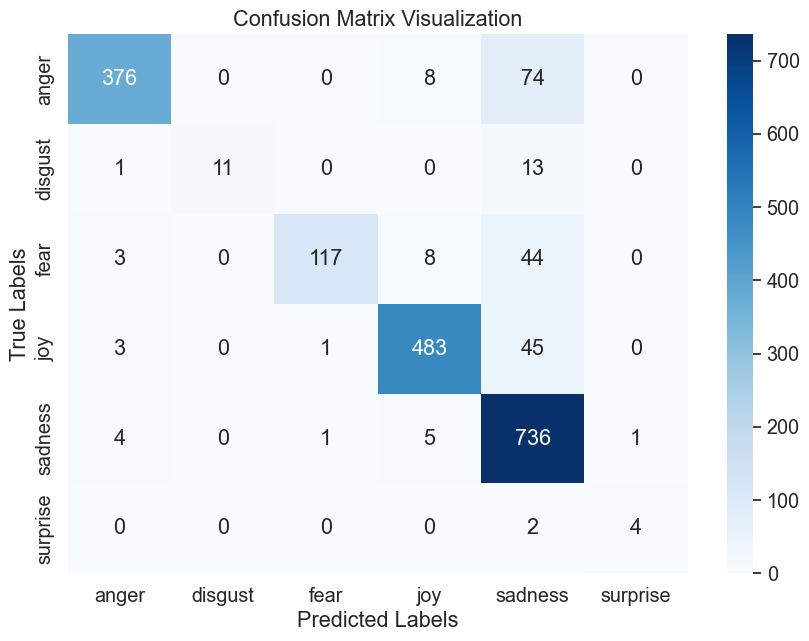

In [131]:
print("TF-IDF - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


#### BM-25

In [146]:
svm = train_model_BM_25((SVC(kernel="poly")), X_train, y_train)

In [147]:
y_pred_svm = svm.predict(X_test)

BM-25 - SVM
Accuracy: SVM 0.7030927835051546 

SVM
              precision    recall  f1-score   support

       anger       0.89      0.51      0.65       458
     disgust       0.43      0.12      0.19        25
        fear       0.76      0.44      0.56       172
         joy       0.96      0.64      0.77       532
     sadness       0.59      0.95      0.73       747
    surprise       0.18      0.50      0.26         6

    accuracy                           0.70      1940
   macro avg       0.63      0.53      0.53      1940
weighted avg       0.77      0.70      0.70      1940



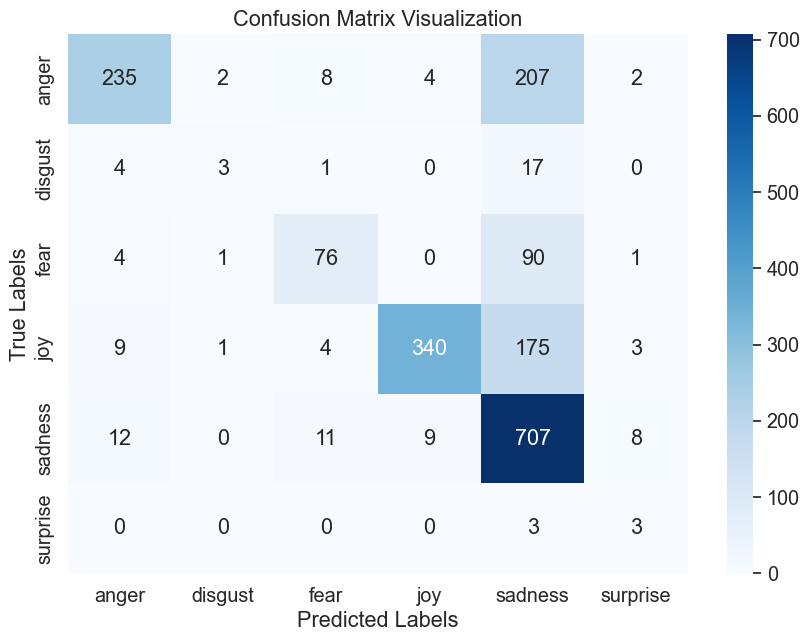

In [148]:
print("BM-25 - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()


#### Word2Vec

In [143]:
svm = train_model_word2vec((SVC(kernel="poly")), X_train, y_train)

In [144]:
y_pred_svm=svm.predict(X_test) 

Word2Vec - SVM
Accuracy: SVM 0.49123711340206183 

SVM
              precision    recall  f1-score   support

       anger       0.34      0.80      0.48       458
     disgust       0.00      0.00      0.00        25
        fear       0.29      0.06      0.10       172
         joy       0.86      0.48      0.61       532
     sadness       0.60      0.43      0.50       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.49      1940
   macro avg       0.35      0.30      0.28      1940
weighted avg       0.57      0.49      0.48      1940



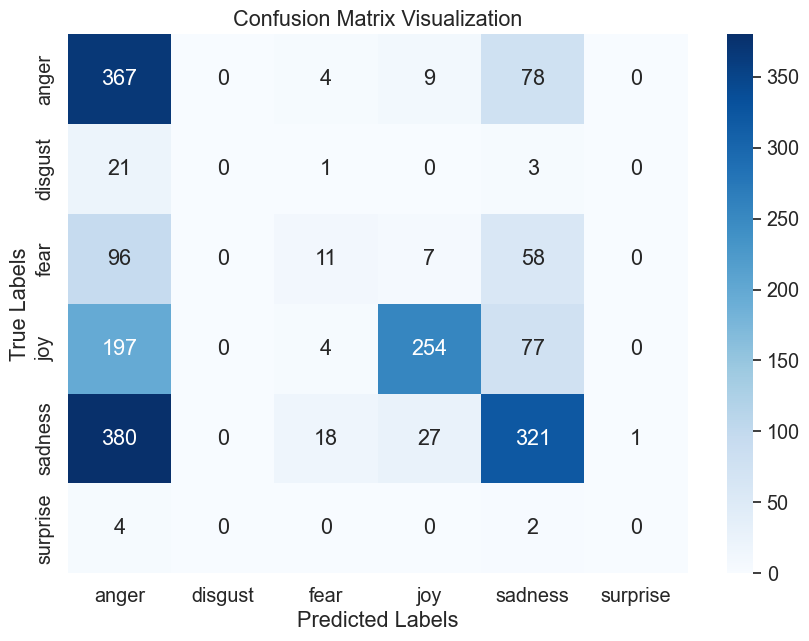

In [145]:
print("Word2Vec - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)

# Plotting
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Glove

In [132]:
svm = train_model_GloVe((SVC(kernel="poly")), X_train, y_train)

In [133]:
y_pred_svm=svm.predict(X_test) 

TF-IDF - SVM
Accuracy: SVM 0.3845360824742268 

SVM
              precision    recall  f1-score   support

       anger       0.14      0.01      0.02       458
     disgust       0.00      0.00      0.00        25
        fear       0.00      0.00      0.00       172
         joy       0.36      0.03      0.05       532
     sadness       0.39      0.97      0.56       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.38      1940
   macro avg       0.15      0.17      0.10      1940
weighted avg       0.28      0.38      0.23      1940



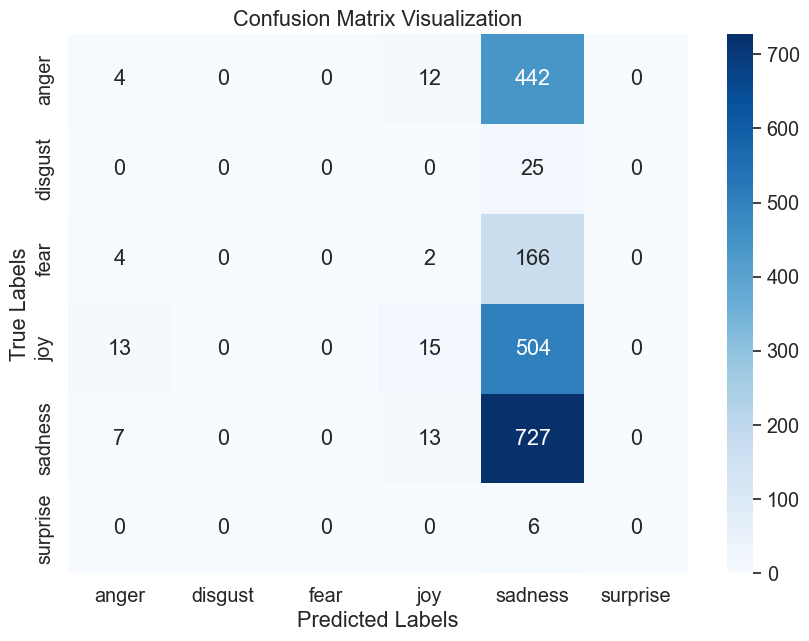

In [134]:
print("TF-IDF - SVM")
SVM_accuracy = accuracy_score(y_test, y_pred_svm)
print('Accuracy: SVM', SVM_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_svm))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### KNN model

#### TF-IDF

In [135]:
knn = train_model_IDF((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

TF-IDF - KNN
Accuracy: SVM 0.85 

SVM
              precision    recall  f1-score   support

       anger       0.98      0.79      0.88       458
     disgust       0.67      0.56      0.61        25
        fear       0.92      0.69      0.79       172
         joy       0.68      0.98      0.80       532
     sadness       0.97      0.84      0.90       747
    surprise       0.57      0.67      0.62         6

    accuracy                           0.85      1940
   macro avg       0.80      0.75      0.77      1940
weighted avg       0.88      0.85      0.85      1940



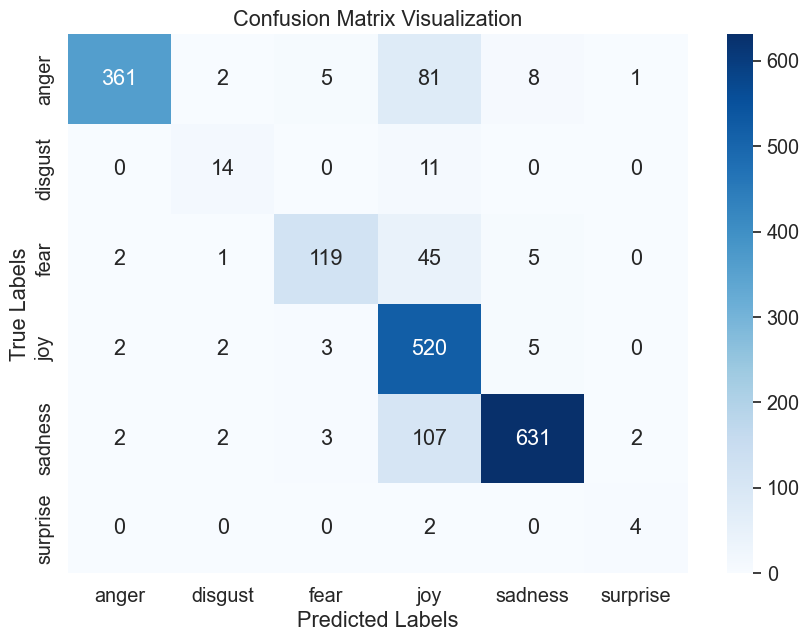

In [136]:
print("TF-IDF - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: SVM', KNN_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### BM-25

In [137]:
knn = train_model_BM_25((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_KNN = knn.predict(X_test)

BM-25 - KNN
Accuracy: SVM 0.8134020618556701 

SVM
              precision    recall  f1-score   support

       anger       0.87      0.78      0.82       458
     disgust       0.46      0.48      0.47        25
        fear       0.73      0.74      0.73       172
         joy       0.81      0.86      0.83       532
     sadness       0.89      0.83      0.86       747
    surprise       0.06      0.67      0.11         6

    accuracy                           0.81      1940
   macro avg       0.64      0.73      0.64      1940
weighted avg       0.84      0.81      0.82      1940



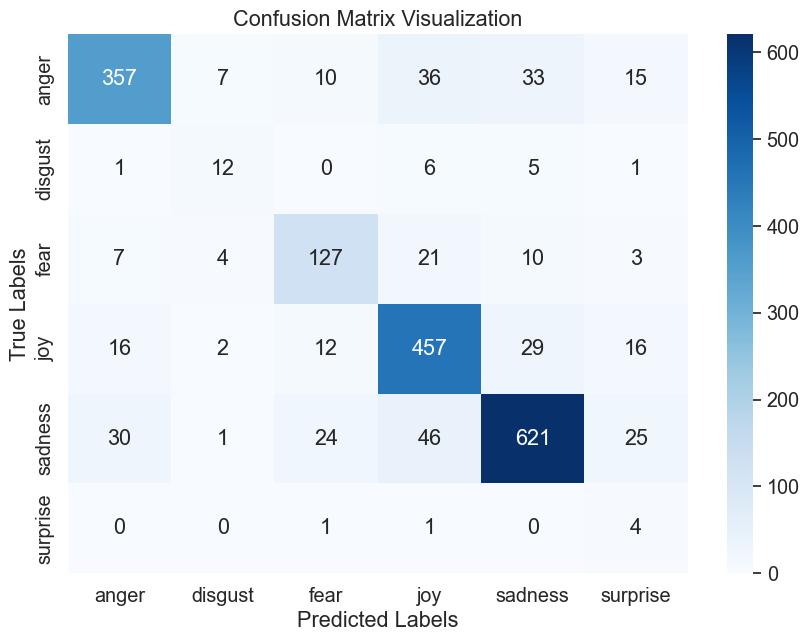

In [138]:
print("BM-25 - KNN")
KNN_accuracy = accuracy_score(y_test, y_pred_KNN)
print('Accuracy: SVM', KNN_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_KNN))

cm = confusion_matrix(y_test, y_pred_KNN)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Word2Vec

In [139]:
knn = train_model_word2vec((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_Word2Vec = knn.predict(X_test)

Word2Vec - KNN
Accuracy: SVM 0.7118556701030928 

SVM
              precision    recall  f1-score   support

       anger       0.69      0.74      0.72       458
     disgust       0.39      0.28      0.33        25
        fear       0.56      0.63      0.59       172
         joy       0.82      0.68      0.74       532
     sadness       0.78      0.75      0.77       747
    surprise       0.04      0.50      0.07         6

    accuracy                           0.71      1940
   macro avg       0.55      0.60      0.54      1940
weighted avg       0.74      0.71      0.72      1940



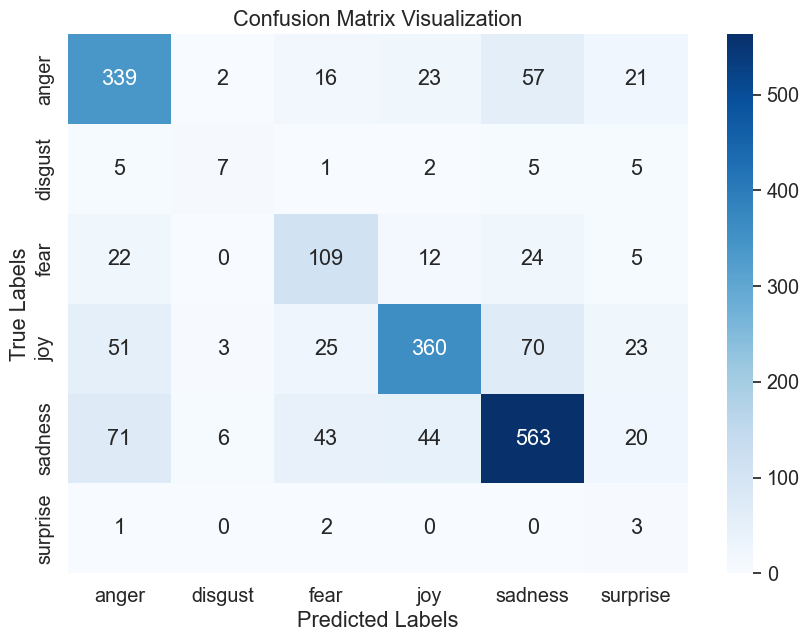

In [140]:
print("Word2Vec - KNN")
Word2Vec_accuracy = accuracy_score(y_test, y_pred_Word2Vec)
print('Accuracy: SVM', Word2Vec_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_Word2Vec))

cm = confusion_matrix(y_test, y_pred_Word2Vec)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Glove

In [141]:
knn = train_model_GloVe((KNeighborsClassifier(n_neighbors=1, algorithm= 'brute', leaf_size = 5)), X_train, y_train)
y_pred_Glove = knn.predict(X_test)

Glove - KNN
Accuracy: SVM 0.2365979381443299 

SVM
              precision    recall  f1-score   support

       anger       0.24      0.95      0.38       458
     disgust       0.00      0.00      0.00        25
        fear       0.00      0.00      0.00       172
         joy       0.34      0.04      0.07       532
     sadness       0.19      0.01      0.01       747
    surprise       0.00      0.00      0.00         6

    accuracy                           0.24      1940
   macro avg       0.13      0.17      0.08      1940
weighted avg       0.22      0.24      0.11      1940



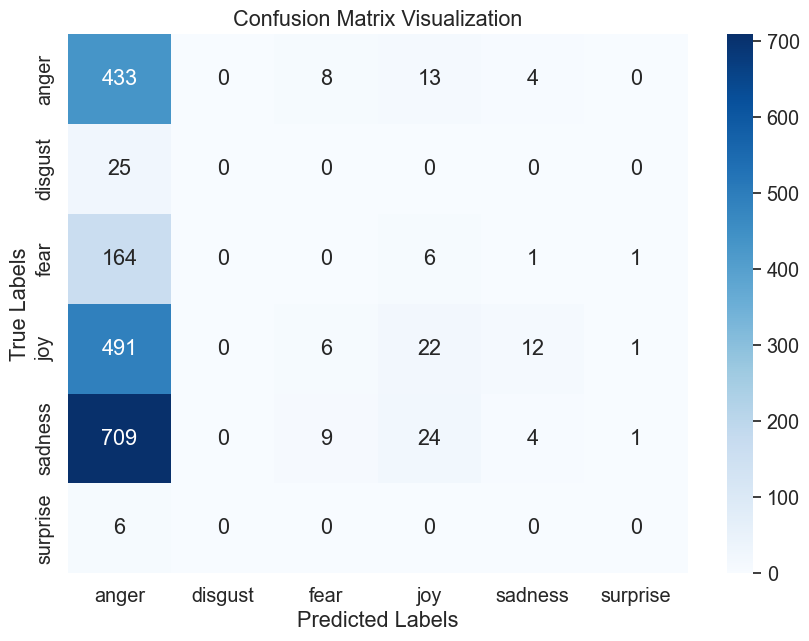

In [142]:
print("Glove - KNN")
Glove_accuracy = accuracy_score(y_test, y_pred_Glove)
print('Accuracy: SVM', Glove_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_Glove))

cm = confusion_matrix(y_test, y_pred_Glove)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

### XGBoost

#### TF-IDF

In [ ]:
import xgboost as xgb

XGB = train_model_IDF((xgb.XGBClassifier()), X_train, y_train)

In [ ]:
y_pred_XGB = XGB.predict(X_test)

In [ ]:
print("TF-IDF - XGB")
XGB_accuracy = accuracy_score(y_test, y_pred_XGB)
print('Accuracy: SVM', XGB_accuracy,'\n')

print('SVM')
print(classification_report(y_test, y_pred_XGB))

cm = confusion_matrix(y_test, y_pred_XGB)
plt.figure(figsize=(10, 7)) 
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Visualization')
plt.show()

#### Search for best hyper

In [127]:
from sklearn.model_selection import GridSearchCV

# Define the pipeline
pipeline = Pipeline([
    ('vect', TfidfVectorizer(encoding='utf-8')),
    ('clf', SVC())
])

# Define the parameter grid
param_grid = {
    'vect__max_df': [0.5, 0.75, 1.0],
    'vect__min_df': [1, 2, 3, 5],
    'vect__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 2), (2, 3)],
    'vect__norm': ['l1', 'l2', None],  # Normalization applied to the TF-IDF
    'clf__C': [0.01, 0.1, 1, 10, 100, 1000],
    'clf__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'clf__gamma': ['scale', 'auto', 0.1, 1, 10],
    'clf__degree': [2, 3, 4]  # Degree of the polynomial kernel function
}

# Set up the grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Get the best score and parameters
best_score = grid_search.best_score_
best_params = grid_search.best_params_

print("Best score: ", best_score)
print("Best parameters set:")
for param_name in sorted(best_params.keys()):
    print(f"{param_name}: {best_params[param_name]}")


Fitting 5 folds for each of 64800 candidates, totalling 324000 fits


KeyboardInterrupt: 

## For Fun :)

In [101]:
myTest=['مبسوط','ما احبك',' خايف','مرعوب عندي اختبارر',"عندي اختبار بكره ومتوتر ما ذاكرت","متفاجئ","زعلان منهم"] 

tt = pd.DataFrame(myTest, columns=['words'])

print(tt.words)

tt.words=tt.words.apply(lambda text : remove_stop_words(text))
tt.words=tt.words.apply(lambda text : normalizeArabic(text))
tt.words=tt.words.apply(lambda text : lemmatize_arabic_Iris(text))

print(tt.words)


y_pred=RF.predict(tt.words)
print()
print(y_pred)
print("=================")
print(f'',list(y_test),'\n')
for i in range(len(tt.words)):
    print(tt.words[i])
    print(y_pred[i])

0                               مبسوط
1                             ما احبك
2                                خايف
3                  مرعوب عندي اختبارر
4    عندي اختبار بكره ومتوتر ما ذاكرت
5                              متفاجئ
6                          زعلان منهم
Name: words, dtype: object
0                 بسط
1                 احب
2                 خيف
3          رعب ختبارر
4    خبر بكر توتر ذكر
5                فاجء
6                 زعل
Name: words, dtype: object

['joy' 'joy' 'fear' 'fear' 'sadness' 'surprise' 'surprise']
 ['emotion'] 

بسط
joy
احب
joy
خيف
fear
رعب ختبارر
fear
خبر بكر توتر ذكر
sadness
فاجء
surprise
زعل
surprise
